In [1]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer 
import re
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [11]:
contractions = {"aight": "alright",
"ain't": "am not",
"amn't": "am not",
"aren't": "are not",
"can't": "cannot",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"daren't": "dared not",
"daresn't": "dare not",
"dasn't": "dare not",
"didn't":"did not",
"doesn't":"does not",
"don't": "do not",
"dunno": "do not know",
"d'ye": "do you",
"e'er":"ever",
"'em": "them",
"everybody's":"everybody is",
"everyone's": "everyone is",
"finna": "going to",
"g'day": "good day",
"gimme":"give me",
"giv'n": "given",
"gonna": "going to",
"gon't": "go not",
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't": "has not",
"haven't":"have not",
"he'd": "he would",
"he'll": "he will", 
"he's": "he is",
"here's": "here is",
"he've":"he have",
"how'd": "how did", 
"howdy": "how do you do",
"how'll": "how will",
"how're": "how are",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'm": "I am",
"I'm'a": "I am about to",
"I'm'o": "I am going to",
"innit": "is it not",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"iunno": "I don't know",
"kinda": "kind of",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"may've": "may have",
"methinks": "me thinks",
"mightn't": "might not",
"might've": "might have",
"mustn't": "must not",
"mustn't've": "must not have",
"must've": "must have",
"needn't":"need not",
"nal" : "and all",
"ne'er": "never",
"o'clock": "of the clock",
"o'er": "over",
"ol'": "old",
"oughtn't": "ought not",
"shan't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't" :"should not",
"shouldn't've": "should not have",
"somebody's":"somebody is",
"someone's": "someone is",
"something's": "something is",
"so're":"so are",
"that'll":"that will",
"that're": "that are",
"that's": "that is",
"that'd": "that would",
"there'd": "there would",
"there'll":"there will",
"there're": "there are",
"there's": "there has",
"these're": "these are",
"these've": "these have",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"this's": "this is",
"those're": "those are",
"those've": "those have",
"'tis": "it is",
"to've": "to have",
"'twas": "it was",
"wanna": "want to",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we're": "we are",
"we've": "we have", 
"weren't": "were not", 
"what'd": "what did",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"where'd": "where did",
"where'll": "where will",
"where're": "where are",
"where's": "where is",
"where've": "where have",
"which'd": "which would",
"which'll": "which will",
"which're": "which are",
"which's": "which is",
"which've": "which have",
"who'd": "who would",
"who'd've": "who would have",
"who'll": "who will",
"who're": "who are",
"who's": "who is",
"who've": "who have",
"why'd": "why did",
"why're": "why are",
"why's": "why is",
"willn't": "will not",
"won't": "will not",
"wonnot": "will not",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd've": "you all would have",
"y'all'd'n've": "you all would not have",
"y'all're": "you all are",
"y'at": "you at",
"you'd": "you would",
"you'll": "you will",
"you're": "you are",
"you've": "you have"
               }

In [12]:
def cal_hm_acc(class_report):
    labels = df['lyrics sentiment'].value_counts().index.tolist()
    sum_recall = 0
    for x in labels: 
        sum_recall += 1/class_report[x]['recall']
    harmonic_mean_acc = 1/((1/len(labels))*(sum_recall))
    return harmonic_mean_acc

In [90]:
df = pd.read_csv('MoodyLyrics-1865-Sentiment-Audio.csv', index_col=0, encoding="utf-8")
df.head(5)

,artist,title,lyrics sentiment,mood,lyrics,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
index,,,,,,,,,,,,,,,,,
ML1,George Michael,I Want Your Sex,pos,happy,In the past there were arguments for and again...,6QnFHieoch6U9J8zfv6hml,0.812,0.600,10,-13.418,0,0.0538,0.005090,0.02480,0.0465,0.800,99.189
ML2,Rob Zombie,Pussy Liquor,neg,angry,Baby :\nGimme a B\nGimme a A\nGimme a B\nGimme...,03VzAAMs5PrLM42XR7ijuc,0.540,0.923,10,-3.965,1,0.0324,0.000347,0.00614,0.4840,0.531,112.936
ML3,Katatonia,12,neg,sad,Black theatre of love\nViolet dancers cast the...,4GCOPgFknQSHVXuAAdQYjk,0.134,0.674,6,-8.428,1,0.0478,0.000460,0.70300,0.2040,0.162,69.289
ML4,Bing Crosby,Swinging On A Star,pos,happy,Would you like to swing on a star\nCarry moonb...,7xy0PAZxzGDOcYzyptvprd,0.706,0.167,0,-13.137,1,0.0602,0.896000,0.00000,0.1010,0.724,139.763
ML5,Ludacris,Get Back,neg,angry,"Heads up! (woop, woop) Heads up! (woop, woop)\...",6o3MvjWfF0jczTzPRcfZsK,0.562,0.638,1,-5.141,1,0.2750,0.055900,0.00000,0.1270,0.165,171.758


In [5]:
def clean_lyrics(lyrics):
    # Replace next line characters with spaces
    lyrics = lyrics.replace("\\n", " ")
    lyrics = lyrics.replace("’", "'")
    #print("Changed next line to space:\n",lyrics, "\n")
    # Remove section headers in brackets - will include adlibs and background vocals
    lyrics = re.sub("[\(\[].*?[\)\]]", "", lyrics)
    #print("Removed section headers in brackets:\n", lyrics, "\n")
    # Remove section headers and terms not in brackets - repeat x2 or repeat 2x or repeat 2
    headers = ["Verse", "Chorus", "Repeat", "Solo", "Bridge", "Interlude", "Instrumental"]
    for header in headers:
        lyrics = re.sub(r'(?:\b'+header+r'\b\s\dx|\b'+header+r'\b\sx\d|\b'+header+r'\b\s\d|\b'+header+r'\b\s\d\:)', "", lyrics, flags=re.IGNORECASE)
        lyrics = re.sub(r'\s+?(?:\b'+header+r'\b)\s*?', "", lyrics)
    
    # Expand contractions
    word_list = lyrics.split()
    for i in range(0, len(word_list)):
        word = word_list[i].lower()
        if word in contractions.keys():
            word_list[i] = contractions[word]
            
    lyrics = ' '.join(word_list)
    
    # Remove remaining numbers
    lyrics = re.sub(r'\d+', " ", lyrics)
    
    # Remove punctuations
    punctuations = '''-;:'?"\,<>.../@#$%^&*_~'''
    
    for punc in punctuations:
        lyrics = lyrics.replace(punc, " ")
    
    lem_lyrics = []
    list_lyrics = lyrics.split()
    for i in range(len(list_lyrics)):
        word = list_lyrics[i].lower()
        if not (len(word) == 1 and word not in ['i', 'a']):
            #word = lemmatizer.lemmatize(word)
            lem_lyrics.append(word)
            
    # Remove any double spaces
    lyrics = ' '.join(lem_lyrics)
    
    return lyrics.lower()

df['lyrics'] = df['lyrics'].apply(clean_lyrics)

df['lyrics'].head(5)

index
ML1    in the past there were arguments for and again...
ML2    baby give me a give me a a give me a give me a...
ML3    black theatre of love violet dancers cast thei...
ML4    would you like to swing on a star carry moonbe...
ML5    heads up! heads up! here is another one! and a...
Name: lyrics, dtype: object

In [91]:
def clean_lyrics(lyrics):
    # Replace next line characters with spaces
    lyrics = lyrics.replace("\\n", " ")
    lyrics = lyrics.replace("’", "'")
    #print("Changed next line to space:\n",lyrics, "\n")
    # Remove section headers in brackets - will include adlibs and background vocals
    lyrics = re.sub("[\(\[].*?[\)\]]", "", lyrics)
    #print("Removed section headers in brackets:\n", lyrics, "\n")
    # Remove section headers and terms not in brackets - repeat x2 or repeat 2x or repeat 2
    headers = ["Verse", "Chorus", "Repeat", "Solo", "Bridge", "Interlude", "Instrumental"]
    for header in headers:
        lyrics = re.sub(r'(?:\b'+header+r'\b\s\dx|\b'+header+r'\b\sx\d|\b'+header+r'\b\s\d|\b'+header+r'\b\s\d\:)', "", lyrics, flags=re.IGNORECASE)
        lyrics = re.sub(r'\s+?(?:\b'+header+r'\b)\s*?', "", lyrics)
    
    # Expand contractions
    word_list = lyrics.split()
    for i in range(0, len(word_list)):
        word = word_list[i].lower()
        if word in contractions.keys():
            word_list[i] = contractions[word]
            
    lyrics = ' '.join(word_list)
    
    # Remove remaining numbers
    lyrics = re.sub(r'\d+', " ", lyrics)
    
    # Remove punctuations
    punctuations = '''-;:?'"\,<>./@#$%^&*_~'''
    
    for punc in punctuations:
        lyrics = lyrics.replace(punc, " ")
        
    lem_lyrics = []
    list_lyrics = lyrics.split()
    for i in range(len(list_lyrics)):
        word = list_lyrics[i].lower()
        if not (len(word) == 1 and word not in ['i', 'a']):
            #word = lemmatizer.lemmatize(word)
            lem_lyrics.append(word)
    
    # Remove any double spaces
    lyrics = ' '.join(lem_lyrics)
    
    return lyrics

df['lyrics'] = df['lyrics'].apply(clean_lyrics)

df['lyrics'].head(3)


index
ML1    in the past there were arguments for and again...
ML2    baby give me a give me a a give me a give me a...
ML3    black theatre of love violet dancers cast thei...
Name: lyrics, dtype: object

In [92]:
lyrics = np.asarray(df['lyrics'], dtype="str")

In [37]:
targetLabels = np.asarray(df['lyrics sentiment'], dtype="str")
targetLabels[:4]

array(['pos', 'neg', 'neg', 'pos'], dtype='<U3')

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(lyrics, targetLabels, test_size=0.2, random_state=0)

In [65]:
senti_clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', ComplementNB()),
])

senti_clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('model', ComplementNB())])

In [66]:
scores = cross_val_score(senti_clf, X_train, Y_train, cv=10)
print("Score by fold: " + str(scores))
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score by fold: [0.68       0.66       0.66442953 0.65771812 0.66442953 0.67785235
 0.67785235 0.6442953  0.6442953  0.67114094]
Accuracy: 0.6642 (+/- 0.02)


Accuracy = 0.6836461126005362
Confusion Matrix:


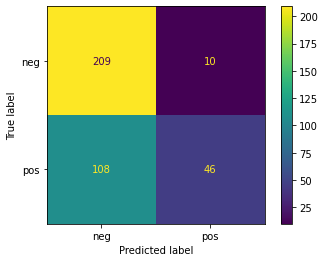

ROC Curve:


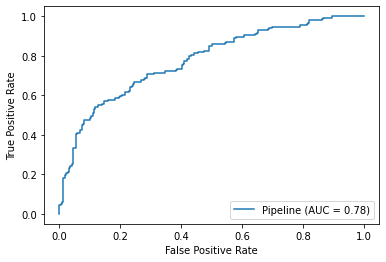

PR Curve:


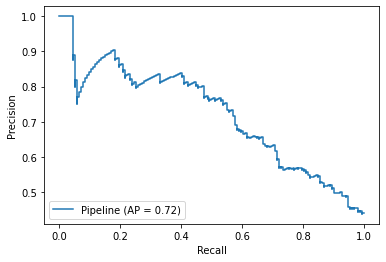

              precision    recall  f1-score   support

         neg       0.66      0.95      0.78       219
         pos       0.82      0.30      0.44       154

    accuracy                           0.68       373
   macro avg       0.74      0.63      0.61       373
weighted avg       0.73      0.68      0.64       373



In [67]:
predictions = senti_clf.predict(X_test)
print("Accuracy = " + str(accuracy_score(Y_test, predictions, normalize=True)))
print("Confusion Matrix:")
plot_confusion_matrix(senti_clf, X_test, Y_test) 
plt.show()
print("ROC Curve:")
plot_roc_curve(senti_clf, X_test, Y_test)
plt.show()
print("PR Curve:")
plot_precision_recall_curve(senti_clf, X_test, Y_test)
plt.show()
print(classification_report(Y_test, predictions))

In [68]:
report = classification_report(Y_test, predictions, output_dict=True)

harmonic_mean_acc = 1/((1/2)*((1/report['neg']['recall']) + (1/report['pos']['recall'])))

harmonic_mean_acc

0.4549929010884997

In [69]:
senti_clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', RandomForestClassifier()),
])

senti_clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', RandomForestClassifier())])

In [70]:
scores = cross_val_score(senti_clf, X_train, Y_train, cv=10)
print("Score by fold: " + str(scores))
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score by fold: [0.66666667 0.69333333 0.69127517 0.65771812 0.68456376 0.68456376
 0.67114094 0.77852349 0.65100671 0.69798658]
Accuracy: 0.6877 (+/- 0.07)


Accuracy = 0.6863270777479893
Confusion Matrix:


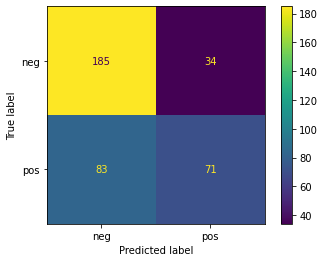

ROC Curve:


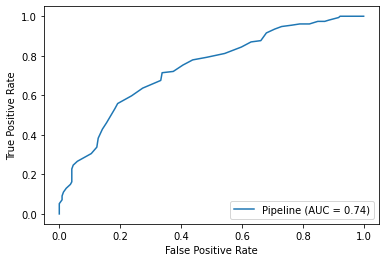

PR Curve:


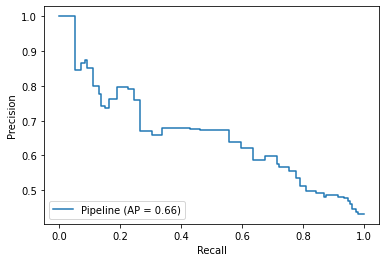

              precision    recall  f1-score   support

         neg       0.69      0.84      0.76       219
         pos       0.68      0.46      0.55       154

    accuracy                           0.69       373
   macro avg       0.68      0.65      0.65       373
weighted avg       0.68      0.69      0.67       373



In [73]:
predictions = senti_clf.predict(X_test)
print("Accuracy = " + str(accuracy_score(Y_test, predictions, normalize=True)))
print("Confusion Matrix:")
plot_confusion_matrix(senti_clf, X_test, Y_test) 
plt.show()
print("ROC Curve:")
plot_roc_curve(senti_clf, X_test, Y_test)
plt.show()
print("PR Curve:")
plot_precision_recall_curve(senti_clf, X_test, Y_test)
plt.show()
print(classification_report(Y_test, predictions))

In [74]:
report = classification_report(Y_test, predictions, output_dict=True)

harmonic_mean_acc = 1/((1/2)*((1/report['neg']['recall']) + (1/report['pos']['recall'])))

harmonic_mean_acc

0.5965167238129839

### NLTK

In [14]:
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.util import *

In [15]:
stopwords = []
for word in text.ENGLISH_STOP_WORDS:
    stopwords.append(word)

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [35]:
test = lyrics[0:3]

In [30]:
lemmatizer = WordNetLemmatizer()

In [85]:
def alt_clean_lyrics(lyrics):
    # Replace next line characters with spaces
    #lyrics = lyrics.replace("\\n", " ")
    lyrics = lyrics.replace("’", "'")
    #print("Changed next line to space:\n",lyrics, "\n")
    # Remove section headers in brackets - will include adlibs and background vocals
    #lyrics = re.sub("[\(\[].*?[\)\]]", "", lyrics)
    #print("Removed section headers in brackets:\n", lyrics, "\n")
    # Remove section headers and terms not in brackets - repeat x2 or repeat 2x or repeat 2
    headers = ["Verse", "Chorus", "Repeat", "Solo", "Bridge", "Interlude", "Instrumental"]
    for header in headers:
        lyrics = re.sub(r'(?:\b'+header+r'\b\s\dx|\b'+header+r'\b\sx\d|\b'
                        +header+r'\b\s\d|\b'+header+r'\b\s\d\:)', "", lyrics, flags=re.IGNORECASE)
        lyrics = re.sub(r'\s+?(?:\b'+header+r'\b)\s*?', "", lyrics)
    
    lem_lyrics = []
    list_lyrics = lyrics.split()
    for i in range(len(list_lyrics)):
        word = list_lyrics[i].lower()
        if not (len(word) == 1 and word not in ['i', 'a']):
            word = lemmatizer.lemmatize(list_lyrics[i])
            lem_lyrics.append(word)
            
    # Remove any double spaces
    lyrics = ' '.join(lem_lyrics)
    
    return lyrics

df['lyrics'] = df['lyrics'].apply(alt_clean_lyrics)

df['lyrics'].head(5)

index
ML1    In the past there were argument for and agains...
ML2    Baby :\nGimme a B\nGimme a A\nGimme a B\nGimme...
ML3    Black theatre of love\nViolet dancer cast thei...
ML4    Would you like to swing on a star\nCarry moonb...
ML5    Heads up! (woop, woop) Heads up! (woop, woop)\...
Name: lyrics, dtype: object

In [86]:
lyrics = np.asarray(df['lyrics'], dtype="str")

In [87]:
lyrics[0]

"In the past there were argument for and against casual sex. Then it became a question of morality. These day it can be a question of life or death. It's a simple a that. And this song is not about casual sex\\n\\nThere's thing that you guess\\nAnd a'things a'that you know\\nThere's boy you can trust\\nAnd a'girls that you don't\\nThere's little thing you hide\\nAnd little thing that you show\\nSometimes you think you're gonna get it\\nBut you don't and that's just the way it goes\\n\\nI swear I won't tease you\\nWon't tell you no lies\\nDon't need no Bible\\nJust look in my eyes\\nI've a'waited so long baby\\nNow that we're friends\\nEvery man's got his patience\\nAnd here's where mine ends\\n\\nI want your sex\\nI want your love\\nI want your sex\\nI want your...sex\\nIt's playin' on my mind\\nIt's dancin' on my soul\\nIt's taken so much time\\nSo why don't you just let me go\\nI'd really like to try\\nOh, I'd really love to know\\nWhen you tell me you're gonna regret it\\nThen I tel

In [71]:
vader_test_list = lyrics.tolist()
vader = SentimentIntensityAnalyzer()
vader_results = []

i = 0
for ly in vader_test_list:
    song_total = 0
    ly = ly.replace("\\n", " ")
    ly = ly.replace("’", "'")
    #for line in ly.split("\\n"):
    #    line = line.replace("’", "'")
    #    scores = vader.polarity_scores(line)
    #    song_total += scores['compound']
    #song_polarity = song_total / len(ly.split("\\n"))
    song_polarity = vader.polarity_scores(ly)
    if song_polarity['compound'] >= 0:
        vader_results.append("pos")
    else:
        vader_results.append("neg")

In [72]:
match = 0
error = 0

for i in range(len(targetLabels)):
    if targetLabels[i] == vader_results[i]:
        match += 1
    else:
        error += 1
accuracy = match / len(targetLabels)
error = error / len(targetLabels)

print("Accuracy: {}%".format(accuracy))
print("Error: {}%".format(error))

Accuracy: 0.6680965147453083%
Error: 0.3319034852546917%


### TextBlob

In [7]:
from textblob import TextBlob

In [93]:
textblob_test_list = lyrics.tolist()
textblob_results = []

for ly in textblob_test_list:
    song_total = 0
    for line in ly.split("\\n"):
        line = line.replace("’", "'")
        tb_line = TextBlob(line)
        score = tb_line.sentiment.polarity
        song_total += score
    song_polarity = song_total / len(ly.split("\\n"))
    #ly = ly.replace("\\n", " ")
    #ly = ly.replace("’", "'")
    #tb_ly = TextBlob(ly)
    #song_polarity = tb_ly.sentiment.polarity
    if song_polarity >= 0:
        textblob_results.append("pos")
    else:
        textblob_results.append("neg")

In [94]:
match = 0
error = 0

for i in range(len(targetLabels)):
    if targetLabels[i] == textblob_results[i]:
        match += 1
    else:
        error += 1
accuracy = match / len(targetLabels)
error = error / len(targetLabels)

print("Accuracy: {}%".format(accuracy))
print("Error: {}%".format(error))

Accuracy: 0.5989276139410188%
Error: 0.4010723860589812%


In [17]:
kr_string = "쉬운 일이 절대 아냐\n네 앞에 서는 건\n스릴러 한편이야\n잘 나가다가도\n뭔가 어긋나면\n그대로 시작이야\n싸늘해져 가는 네 눈빛\n무거워지는 분위기\n난 그 자리 가만히\n앉은 채 숨을\n고르고 있어\n\n서로를 향한\n말투는 점점 더\n날카로워져만 가\n\n그래 날 쏴\nBang bang\n너의 bullet bullet bullet\n얼마든지 맞아줄게\n원한 게 이거라면\nJust shoot me\nShoot me\n나를 향해 쏴\nBang bang\n그게 편해 편해 편해\n이젠 너무 익숙해\n이걸로 풀린다면\nJust shoot me\nShoot me\n\n이걸 기대한 건 아냐\n너와 원했던 건\n로맨스 한편이야\n하지만 현실은\n툭하면 붉어져\n한편의 드라마야\n너의 대사 속 “이젠 끝이야”\n진심이 아니길 빌어\n그저 불안한 맘에\n뱉은 거라고\n믿고 싶어\n\n서로를 향한\n말투는 점점 더\n날카로워져만 가\n그래 날 쏴\nBang bang\n너의 bullet bullet bullet\n얼마든지 맞아줄게\n원한 게 이거라면\nJust shoot me\nShoot me\n\n나를 향해 쏴\nBang bang\n그게 편해 편해 편해\n이젠 너무 익숙해\n이걸로 풀린다면\nJust shoot me\nShoot me\n\n(I’m okay)\n(So if you wanna hurt me)\n(Baby just hurt me)\n(I’m okay)\n(So if you wanna hurt me)\n(Baby just hurt me)\n가슴에 박히는 너의 한발 한발이\n사실은 너무 아파\nIt hurts so bad so bad\n그래 날 쏴\nBang bang\n너의 bullet bullet bullet\n얼마든지 맞아줄게\n원한 게 이거라면\nJust shoot me\nShoot me\n\n나를 향해 쏴\nBang bang\n그게 편해 편해 편해\n이젠 너무 익숙해\n이걸로 풀린다면\nJust shoot me\nShoot me"
kr_rom_string = "\n\nSaejang ane gatin chaero\nNeomu orae heulleosseo\nTalchulhagetdaneun maeumeun\nJeonbu itgo marasseo\n\nJayuraneun yeolsoen\nGalsurok meoreojigo\nGeuryeowatdeon miraen\nJeomjeom heuryeojyeoman ga\n\nIge jeonburago\nMitgo sipjin anado\nChang bakkui sesangeun\nMeolge neukkyeojyeoseo\n\nLost in this paradise\nYeongwon gatgetjiman\nDa jinagal geoya\nCause we were born to fly\nNun gamgo geuryeobwa\nJigeum yeogil tteona\nKkumkkudeon eodinga\nLost in this paradise\n\nLost in this paradise\nLost in this paradise\n\nAmuri noryeok haebwado\nJigeum urin yeogie\nBeoseonaryeogo haebwado\nGyeolgugeun jejarie\n\nJayuraneun yeolsoen\nGalsurok meoreojigo\nGeuryeowatdeon miraen\nJeomjeom heuryeojyeoman ga\n\nIge jeonburago\nMitgo sipjin anado\nChang bakkui sesangeun\nMeolge neukkyeojyeoseo\n\n\nLost in this paradise\nYeongwon gatgetjiman\nDa jinagal geoya\nCause we were born to fly\nNun gamgo geuryeobwa\nJigeum yeogil tteona\nKkumkkudeon eodinga\nLost in this paradise\n\nLost in this paradise\nLost in this paradise\n\nYeogiseo nagado\nApeul ttaen apado\nHimdeul su isseodo\nGeuraedo tteonallae\nGeurae tteonalge\n\nYeogiseo nagado\nApeul ttaen apado\nHimdeul su isseodo\nGeuraedo tteonallae\nIje tteonalge\n\nLost in this paradise\nYeongwon gatgetjiman\nDa jinagal geoya\nCause we were born to fly\nNun gamgo geuryeobwa\nJigeum yeogil tteona\nKkumkkudeon eodinga\nLost in this paradise\n\nLost in this paradise\nLost in this paradise\n\n\n\n새장 안에 갇힌 채로\n너무 오래 흘렀어\n탈출하겠다는 마음은\n전부 잊고 말았어\n\n자유라는 열쇤\n갈수록 멀어지고\n그려왔던 미랜\n점점 흐려져만 가\n\n이게 전부라고\n믿고 싶진 않아도\n창 밖의 세상은\n멀게 느껴져서\n\nLost in this paradise\n영원 같겠지만\n다 지나갈 거야\nCause we were born to fly\n눈 감고 그려봐\n지금 여길 떠나\n꿈꾸던 어딘가\nLost in this paradise\n\nLost in this paradise\nLost in this paradise\n\n아무리 노력 해봐도\n지금 우린 여기에\n벗어나려고 해봐도\n결국은 제자리에\n\n자유라는 열쇤\n갈수록 멀어지고\n그려왔던 미랜\n점점 흐려져만 가\n\n이게 전부라고\n믿고 싶진 않아도\n창 밖의 세상은\n멀게 느껴져서\n\n\nLost in this paradise\n영원 같겠지만\n다 지나갈 거야\nCause we were born to fly\n눈 감고 그려봐\n지금 여길 떠나\n꿈꾸던 어딘가\nLost in this paradise\n\nLost in this paradise\nLost in this paradise\n\n여기서 나가도\n아플 땐 아파도\n힘들 수 있어도\n그래도 떠날래\n그래 떠날게\n\n여기서 나가도\n아플 땐 아파도\n힘들 수 있어도\n그래도 떠날래\n이제 떠날게\n\nLost in this paradise\n영원 같겠지만\n다 지나갈 거야\nCause we were born to fly\n눈 감고 그려봐\n지금 여길 떠나\n꿈꾸던 어딘가\nLost in this paradise\n\nLost in this paradise\nLost in this paradise"
en_string = "I saw someone who looks just like you\nIn the back seat with her hand out the sunroof\nI swear it was the dress that I gave you\nAnd I wonder if your favorite color still blue?\n\nYou're full of love, and wild and free\nChasin' every dream and possibility\nYou're more than I could ever be-e-e-e\n\nI hope he treats you better than I ever could\n'Cause you deserve the world times two\nAnd our simple Sunday afternoons\nI hopе he's home for you evеn though I had to lose you\nFor you to find who fills your heart\nEven if I'm not the one you choose\n(Ohh, ohh, ohh\nOhh, ohh, ohh\nOhh, ohh, ohh\nOhh, ohh, ohh-ohh)\n\nI thought I caught a glimpse of me and you\nIn our kitchen where I cooked your favorite food\nAnd if I'm being honest, I was a fool\nSo say the word and I'll come runnin' back to you\n\nAnd you're full of love, and wild and free\nChasin' every dream and possibility\nYou're more than I could ever be-e-e-e\n\nI hope he treats you better than I ever could\n'Cause you deserve the world times two\nAnd our simple Sunday afternoons\nI hope he's home for you even though I had to lose you\nFor you to find who fills your heart\nEven if I'm not the one you choose\n\nOhh, oh-oh-oh, ohh, oh-oh-oh\nOhh, oh-oh-oh, ohh, mmm\n\nI hope he treats you better than I ever could\n'Cause you deserve the world times two\nAnd our simple Sunday afternoons\nI hope he's home for you even though I had to lose you\nFor you to find who fills your heart\nEven if I'm not the one you choose\n(Ohh, ohh, ohh)\nAnd I hope he's home for you\n(Ohh, ohh, ohh)\nAnd our Sunday afternoons"
sp_en_string = "Comin' over in my direction\nSo thankful for that, it's such a blessin', yeah\nTurn every situation into heaven, yeah\nOh-oh, you are\nMy sunrise on the darkest day\nGot me feelin' some kind of way\nMake me wanna savor every moment slowly, slowly\nYou fit me tailor-made, love how you put it on\nGot the only key, know how to turn it on\nThe way you nibble on my ear, the only words I wanna hear\nBaby, take it slow so we can last long\n\n¡Oh! Tú, tú eres el imán y yo soy el metal\nMe voy acercando y voy armando el plan\nSólo con pensarlo se acelera el pulso (Oh, yeah)\nYa, ya me está gustando más de lo normal\nTodos mis sentidos van pidiendo más\nEsto hay que tomarlo sin ningún apuro\n\nDespacito\nQuiero respirar tu cuello despacito\nDeja que te diga cosas al oído\nPara que te acuerdes si no estás conmigo\nDespacito\nQuiero desnudarte a besos despacito\nFirmo en las paredes de tu laberinto\nY hacer de tu cuerpo todo un manuscrito\n(Sube, sube, sube\nSube, sube)\nQuiero ver bailar tu pelo, quiero ser tu ritmo (Woah, woah)\nQue le enseñes a mi boca (Woah, woah)\nTus lugares favoritos (Favorito, favorito, baby)\nDéjame sobrepasar tus zonas de peligro (Woah, woah)\nHasta provocar tus gritos (Woah, woah)\nY que olvides tu apellido\n\nSi te pido un beso, ven, dámelo, yo sé que estás pensándolo\nLlevo tiempo intentándolo, mami, esto es dando y dándolo\nSabes que tu corazón conmigo te hace bom, bom\nSabes que esa beba está buscando de mi bom, bom\nVen, prueba de mi boca para ver cómo te sabe\nQuiero, quiero, quiero ver cuánto amor a ti te cabe\nYo no tengo prisa, yo me quiero dar el viaje\nEmpecemos lento, después salvaje\n\nPasito a pasito, suave suavecito\nNos vamos pegando, poquito a poquito\nCuando tú me besas con esa destreza\nVeo que eres malicia con delicadeza\nPasito a pasito, suave suavecito\nNos vamos pegando, poquito a poquito\nY es que esa belleza es un rompecabezas\nPero pa' montarlo aquí tengo la pieza\n¡Oye!\nDespacito\nQuiero respirar tu cuello despacito\nDeja que te diga cosas al oído\nPara que te acuerdes si no estás conmigo\nDespacito\nQuiero desnudarte a besos despacito\nFirmo en las paredes de tu laberinto\nY hacer de tu cuerpo todo un manuscrito\n(Sube, sube, sube\nSube, sube)\n\nQuiero ver bailar tu pelo, quiero ser tu ritmo (Woah, woah)\nQue le enseñes a mi boca (Woah, woah)\nTus lugares favoritos (Favorito, favorito, baby)\nDéjame sobrepasar tus zonas de peligro (Woah, woah)\nHasta provocar tus gritos (Woah, woah)\nY que olvides tu apellido\n\nDespacito\nThis is how we do it down in Puerto Rico\nI just wanna hear you screaming, \"¡Ay, Bendito!\"\nI can move forever cuando esté contigo\n¡Báilalo!\nPasito a pasito, suave suavecito\nNos vamos pegando, poquito a poquito\nQue le enseñes a mi boca\nTus lugares favoritos\n(Favorito, favorito, baby)\nPasito a pasito, suave suavecito\nNos vamos pegando, poquito a poquito\nHasta provocar tus gritos (Fonsi)\nY que olvides tu apellido (D.Y.)\nDespacito"

In [11]:
#kr_string = kr_string.replace("\n", " ")


txtblb = TextBlob(kr_string)

txtblb.detect_language()

'ko'

In [12]:
#kr_rom_string = kr_rom_string.replace("\n", " ")


txtblb = TextBlob(kr_rom_string)

txtblb.detect_language()

'su'

In [13]:
#en_string = en_string.replace("\n", " ")


txtblb = TextBlob(en_string)

txtblb.detect_language()

'en'

In [18]:
#sp_en_string = en_string.replace("\n", " ")


txtblb = TextBlob(sp_en_string)

txtblb.detect_language()

'es'